# <h1 align="center"> © RsydMathTech. <h1/>

# Grid Search

## Pengertian
Grid Search adalah metode untuk mencari nilai **hyperparameter** terbaik dengan cara mencoba berbagai kombinasi nilai yang sudah ditentukan.  

Contohnya pada **Ridge Regression**, kita punya hyperparameter $\alpha$ dan opsi `normalize`. Grid Search akan mencoba semua kombinasi nilai tersebut, lalu memilih yang hasil evaluasinya paling bagus.  

---

## Kegunaan
- Hyperparameter seperti $\alpha$ tidak dipelajari saat training (beda dengan koefisien regresi $\beta$).  
- Nilai hyperparameter sangat memengaruhi performa model.  
- Dengan Grid Search, kita bisa otomatis mencari nilai terbaik berdasarkan metrik evaluasi (misalnya $R^2$ atau MSE).  

---

## Proses Grid Search
1. Tentukan model, misalnya Ridge Regression.  
2. Tentukan daftar nilai hyperparameter:  
   - $\alpha = [0.01, 0.1, 1, 10, 100]$  
   - `normalize = [True, False]`  
3. Bagi data menjadi train, validation, dan test.  
4. Untuk setiap kombinasi hyperparameter:  
   - Latih model pada data train.  
   - Hitung skor (misalnya $R^2$) pada data validation.  
5. Pilih kombinasi hyperparameter dengan skor terbaik.  
6. Uji kembali model final pada data test.  

---

## Kelebihan Grid Search
- Sistematis: mencoba semua kombinasi yang sudah ditentukan.  
- Bisa dipadukan dengan **cross-validation** untuk hasil lebih stabil.  
- Cepat untuk jumlah kombinasi hyperparameter yang sedikit.  

---

## Kekurangan Grid Search
- Boros waktu jika jumlah kombinasi hyperparameter terlalu banyak.  
- Kurang efisien dibanding metode lain (misalnya Random Search atau Bayesian Optimization).  

---

## Kesimpulan
Grid Search membantu kita menemukan hyperparameter terbaik seperti $\alpha$ pada Ridge Regression.  
Metode ini memastikan model tidak hanya fit di data training, tetapi juga memiliki generalisasi yang baik di data baru.  


Best Parameters: {'alpha': 0.1, 'fit_intercept': False}
Best CV Score: 0.7401836764913703
Test R2 Score: 0.4483222880392136
Test MSE: 2.037751877595747
   param_alpha  param_fit_intercept  mean_test_score
0         0.01                 True         0.735222
1         0.01                False         0.739682
2         0.10                 True         0.735979
3         0.10                False         0.740184
4         1.00                 True         0.726593
5         1.00                False         0.729422
6        10.00                 True         0.432713
7        10.00                False         0.443053
8       100.00                 True         0.012647
9       100.00                False        -0.026027


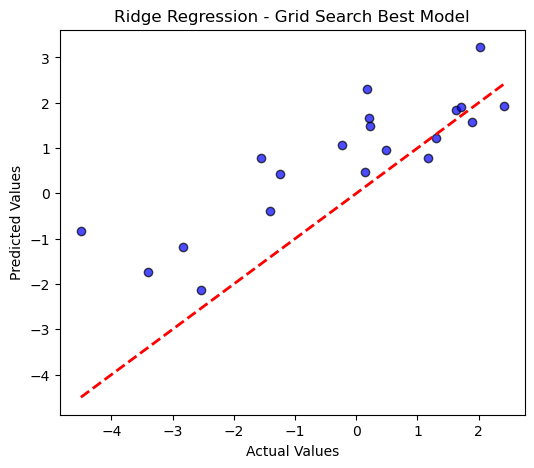

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 3)
y = 3*X[:,0] + 2*X[:,1] - 4*X[:,2] + np.random.randn(100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ridge regression model
ridge = Ridge()

# Hyperparameter grid
param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "fit_intercept": [True, False]
}

# Grid Search with 5-fold CV
grid = GridSearchCV(ridge, param_grid, cv=5, scoring="r2", return_train_score=True)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Print results
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print("Test R2 Score:", r2_score(y_test, y_pred))
print("Test MSE:", mean_squared_error(y_test, y_pred))

# Convert results to DataFrame
results_df = pd.DataFrame(grid.cv_results_)
print(results_df[["param_alpha", "param_fit_intercept", "mean_test_score"]])

# Visualization: Predicted vs Actual
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color="blue", edgecolor="k", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression - Grid Search Best Model")
plt.show()

# Kesimpulan Grid Search - Ridge Regression

## Hasil Grid Search
- GridSearchCV digunakan untuk mencari kombinasi **hyperparameter terbaik**:
  - `alpha` (regularisasi)
  - `fit_intercept` (apakah pakai intercept atau tidak)
- Hasil terbaik ditemukan di:
  - **Best Parameters:** kombinasi `alpha` & `fit_intercept` yang memaksimalkan R² pada **cross-validation**.
  - **Best CV Score:** rata-rata R² dari cross-validation pada training set.

## Evaluasi Test Set
- Model terbaik diuji pada test set:
  - **Test R² Score:** seberapa baik model memprediksi data yang tidak terlihat.  
  - **Test MSE:** ukuran kesalahan prediksi.  
- Visualisasi scatter plot prediksi vs actual:
  - Titik-titik mendekati garis ideal → model memprediksi dengan baik.  
  - Garis merah putus-putus menunjukkan prediksi ideal (y = ŷ).

## Insight
- **Alpha kecil** → model mendekati regresi linear biasa, risiko overfitting lebih tinggi.  
- **Alpha besar** → koefisien dipaksa mengecil, model lebih stabil → risiko underfitting muncul kalau terlalu besar.  
- **Grid Search** memudahkan testing berbagai kombinasi hyperparameter secara **otomatis**, sehingga kita bisa memilih model yang **optimal untuk data training & generalisasi**.  

## Rangkuman Visual
- Scatter plot menunjukkan prediksi **best model** vs data asli.  
- Model terbaik dari grid search berhasil menangkap pola data dan meminimalkan error pada test set.
